In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
#loading the data of the python classifiers

sess3 = pd.read_csv(r"C:\Users\map92fg\Documents\Software\P300_Classification\created_data\Classsifier_Results\accuracies_swlda_resampled_by_Py3GUI.csv")

# renaming sess3ions so that the Session number corresponds to the measuring day

dic = dict(zip(sess3["Session"].unique(),list(range(1,40))))
sess3["Session"] = sess3["Session"].replace(dic)

#loading the BCI2000 data from a text file

bci2k = pd.read_fwf(r"C:\Users\map92fg\Documents\Software\P300_Classification\created_data\Classsifier_Results\bci2000_sessionwise.txt",header=None)[[0,1]].to_numpy()
temp_df = pd.DataFrame(columns=["Accuracy", "Classifier", "Session", "Ep2Avg"])
temp_df["Accuracy"] = bci2k[:,1]*0.01
temp_df["Classifier"] = "BCI2000"
temp_df["Session"] =  [i for i in range(1,int(len(bci2k)/8)+1) for _ in range(8)]
temp_df["Ep2Avg"] = bci2k[:,0]
temp_df

# concatation of the dataframes and added the attribute calibration mode and ITR

sess3 = sess3.append(temp_df)
sess3["Calibration"] = "sess3"
sess3

,Accuracy,Classifier,Session,Ep2Avg,Calibration
0,0.277778,SWLDA,1,1,sess3
1,0.388889,SWLDA,1,2,sess3
2,0.388889,SWLDA,1,3,sess3
3,0.500000,SWLDA,1,4,sess3
4,0.555556,SWLDA,1,5,sess3
...,...,...,...,...,...
307,0.610000,BCI2000,39,4,sess3
308,0.610000,BCI2000,39,5,sess3
309,0.610000,BCI2000,39,6,sess3
310,0.610000,BCI2000,39,7,sess3


In [3]:
swlda = sess3.loc[(sess3.Classifier=="SWLDA") & (sess3.Ep2Avg ==8)]
bci2000 = sess3.loc[(sess3.Classifier=="BCI2000") & (sess3.Ep2Avg ==8)]


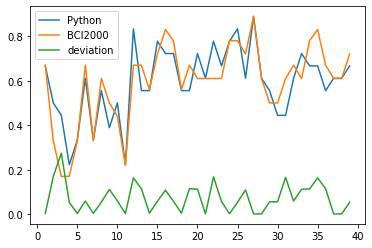

In [5]:
fig,ax = plt.subplots()
ax.plot(swlda.Session,swlda.Accuracy,label="Python")
ax.plot(bci2000.Session,bci2000.Accuracy, label="BCI2000")
ax.plot(bci2000.Session,abs(swlda.Accuracy-bci2000.Accuracy),label="deviation")
plt.legend()
plt.savefig(r"C:\Users\map92fg\Documents\Software\P300_Classification\created_data\Classsifier_Results\accuracies_swlda_resampled_by_Py3GUI.png")

In [34]:
abs(swlda.Accuracy-bci2000.Accuracy).sum()/len(swlda.Accuracy)

0.10282051282051284

In [22]:
abs(swlda.Accuracy-bci2000.Accuracy)

7      0.170000
15     0.114444
23     0.107778
31     0.052222
39     0.170000
47     0.058889
55     0.003333
63     0.001111
71     0.166667
79     0.051111
87     0.053333
95     0.003333
103    0.114444
111    0.171111
119    0.057778
127    0.218889
135    0.057778
143    0.106667
151    0.058889
159    0.167778
167    0.056667
175    0.167778
183    0.001111
191    0.002222
199    0.002222
207    0.053333
215    0.001111
223    0.056667
231    0.111111
239    0.388889
247    0.054444
255    0.107778
263    0.167778
271    0.002222
279    0.052222
287    0.114444
295    0.221111
303    0.167778
311    0.002222
Name: Accuracy, dtype: float64